# Capstone Project- Walmart: 
Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.
Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.
Feature Name Description
Store Store number
Date Week of Sales
Weekly_Sales Sales for the given store in that week
Holiday_Flag If it is a holiday week
Temperature Temperature on the day of the sale
Fuel_Price Cost of the fuel in the region
CPI Consumer Price Index
Unemployment Unemployment Rate
1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:
a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?
b. If the weekly sales show a seasonal trend, when and what could be the reason?
c. Does temperature affect the weekly sales in any manner?
d. How is the Consumer Price index affecting the weekly sales of various stores?
e. Top performing stores according to the historical data.
f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.
2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from lofo import LOFOImportance # https://github.com/aerdem4/lofo-importance
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
#from xgboost import XGBRegressor


C:\Users\HP\AppData\Local\Temp\ipykernel_27280\3838857287.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [118]:
!pip install xgboost



In [10]:
from xgboost import XGBRegressor


In [11]:
df=pd.read_csv("Walmart (1).csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#                         1. Data Analysis and Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [12]:
# Make date column into datetime
df['Date'] = pd.to_datetime((df['Date']),format='%d-%m-%Y')
#df["Date"] = pd.to_datetime(df["Date"])

In [13]:
# Test if it works
print(df[0:1].Date, df[-1:].Date)


0   2010-02-05
Name: Date, dtype: datetime64[ns] 6434   2012-10-26
Name: Date, dtype: datetime64[ns]


In [ ]:
# Assess the total amount of columns and rows in a more consise way
print(df.shape)


In [ ]:
#What do we know about our data so far?
#So we can see we are working with over 6435 rows of data in the train dataframe, over 8 columns. 
#This looks like it's this large due to the fact of the 45 different stores.



In [ ]:
df.describe().T

In [ ]:
df.isnull().sum()

In [ ]:
#Check for outliers

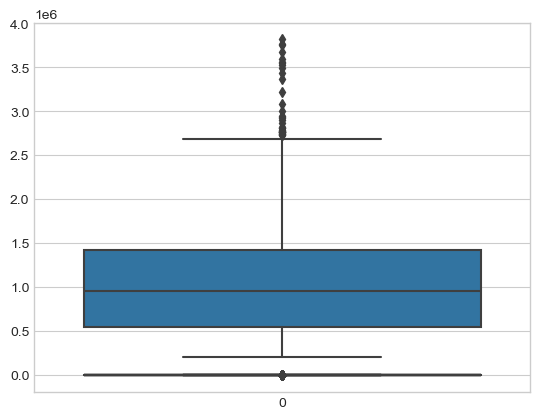

In [14]:
col_list = list(df.columns)


for col in col_list:
 if ((df[col].dtypes == 'int64')| (df[col].dtypes == 'float64')):
   sns.boxplot(df[col])
plt.show()


In [ ]:
df.duplicated().sum()

In [16]:
'''for col in df.columns:
  if df[col].dtype != 'object':
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()'''


"for col in df.columns:\n  if df[col].dtype != 'object':\n    plt.boxplot(df[col])\n    plt.xlabel(col)\n    plt.show()"

In [17]:
#Let us deal with the outliers;
out_col = ['Temperature','Store','Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']


In [21]:
for col in out_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  # Define my IQR
  IQR = Q3 - Q1
  # Defining my limits / whiskers
  LW = Q1 - 1.5*IQR  # lower limit / lower whisker
  UW = Q3 + 1.5*IQR
  # formulation
  df1 = df[(df[col]>=LW) & (df[col]<=UW)]
df1

# The data cleaning and analysis is done till here.




,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
#Since there are no null values we could proceed to Exploration part. Now we are done with Data analysis and Cleaning part.


# 2. Data Exploration
Ways we will explore the data:

.describe() function - general overview
General plots for the different features
Get average weekly sales for each store/department
plot of sales
correlation heatmap


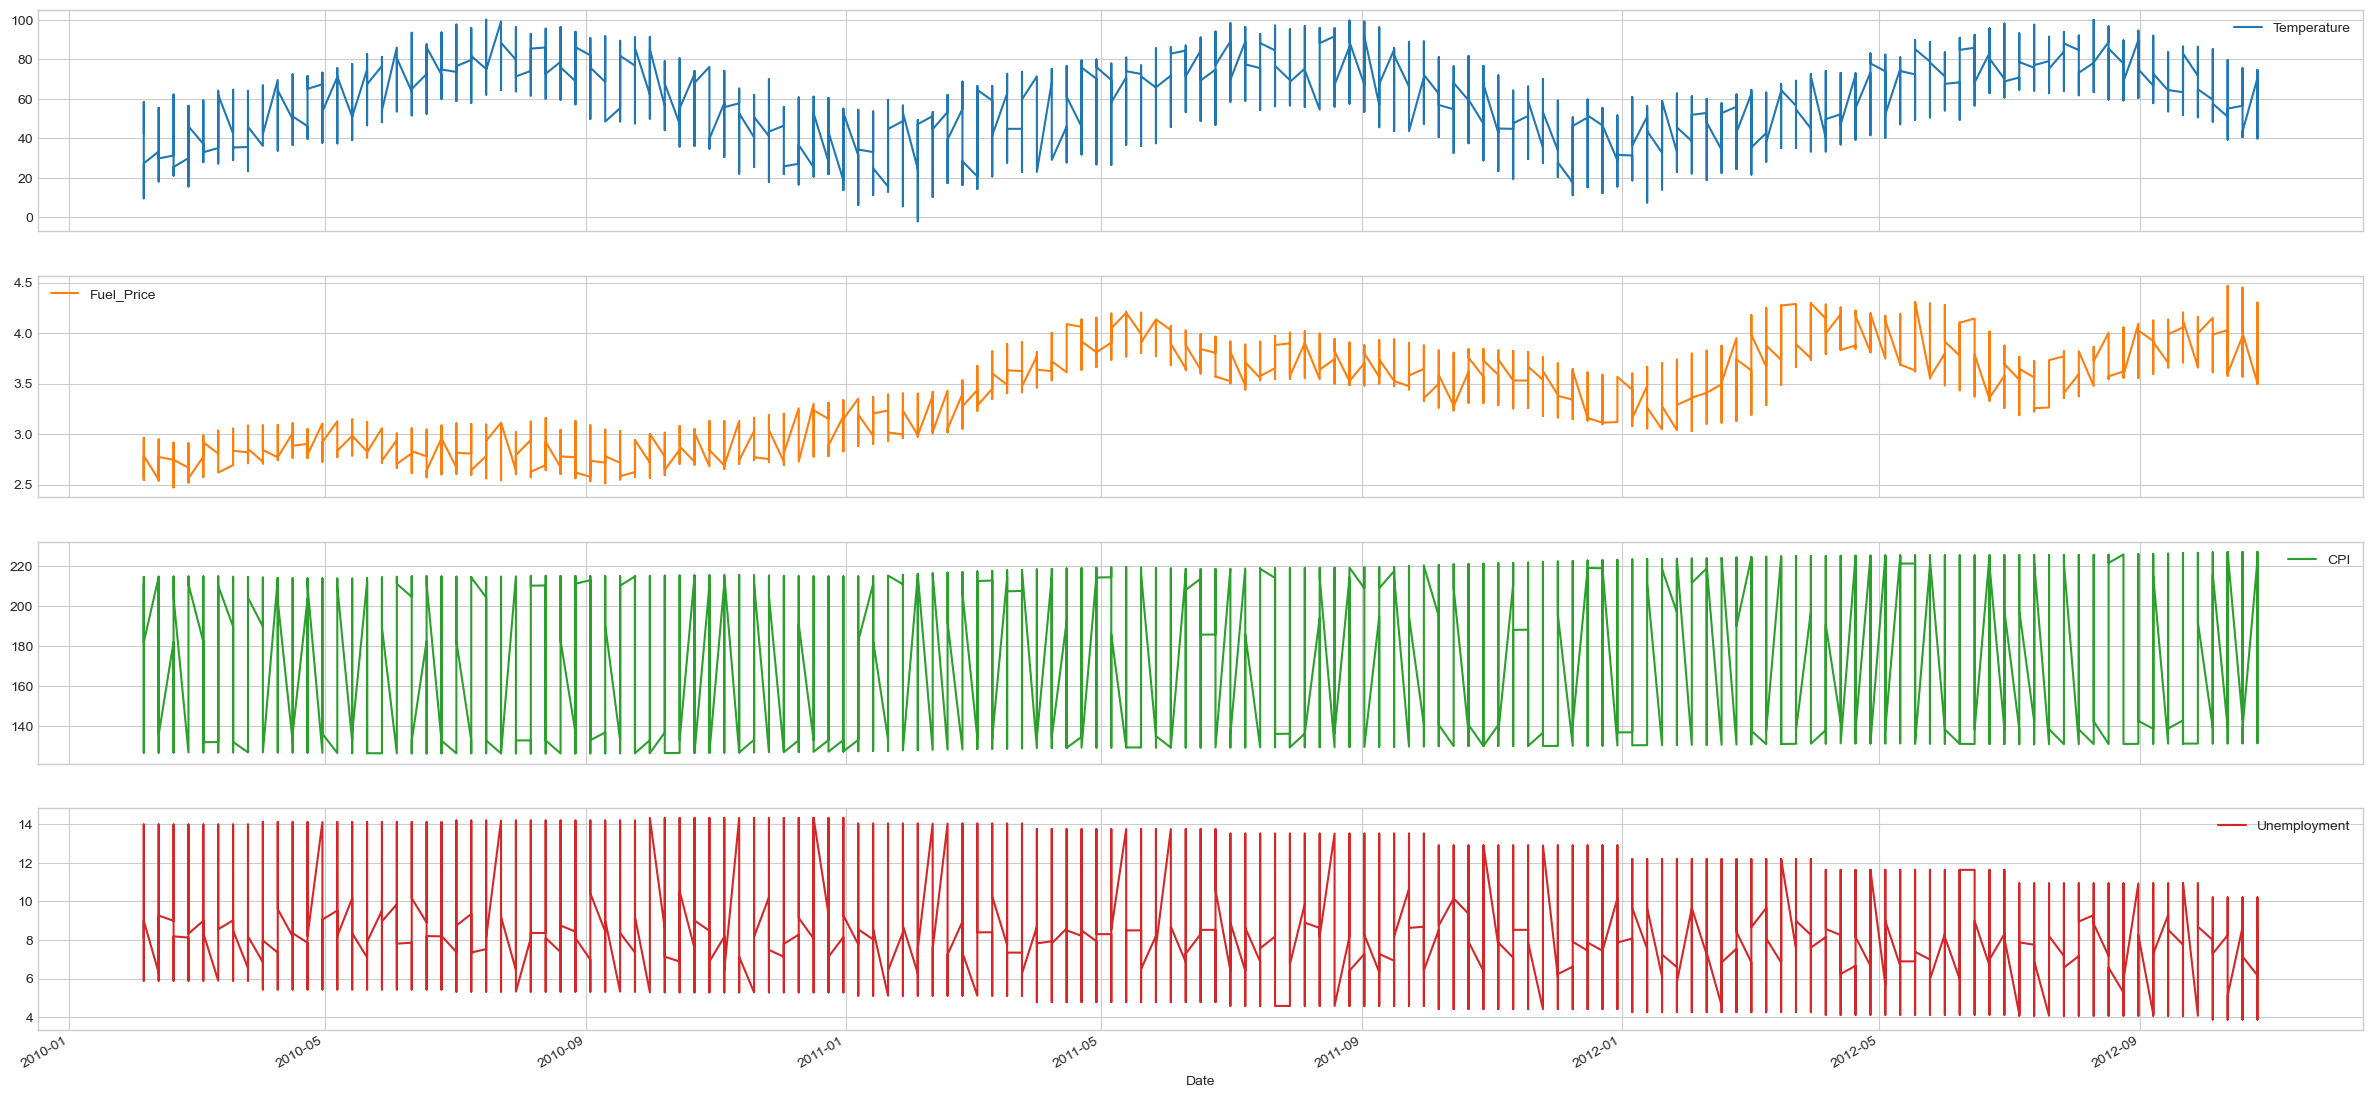

In [18]:
# Plots for the different features in the df1: 
df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].plot(x='Date', subplots=True, figsize=(30,15))

plt.show()




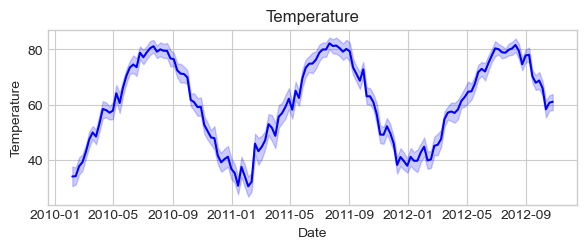

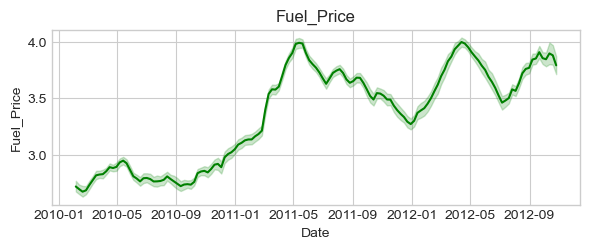

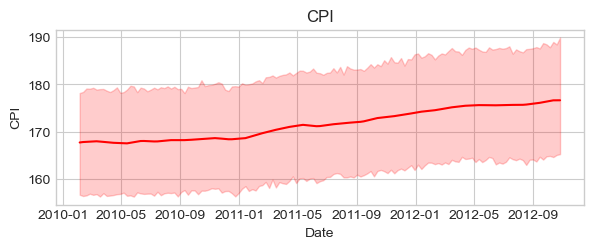

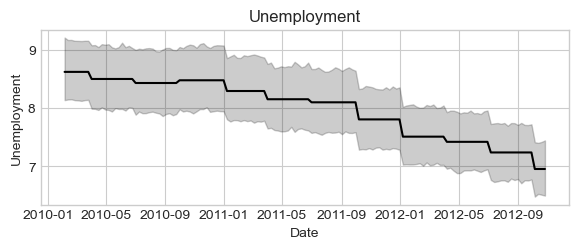

In [127]:
# plotting with seaborn
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.lineplot(x='Date',y='Temperature',data=df,color='blue')
plt.title('Temperature')

plt.figure(figsize=(15,5))
plt.subplot(2,2,2)
sns.lineplot(x='Date',y='Fuel_Price',data=df,color='green')
plt.title('Fuel_Price')

plt.figure(figsize=(15,5))
plt.subplot(2,2,3)
sns.lineplot(x='Date',y='CPI',data=df,color='red')
plt.title('CPI')

plt.figure(figsize=(15,5))
plt.subplot(2,2,4)
sns.lineplot(x='Date',y='Unemployment',data=df,color='black')
plt.title('Unemployment')

#plt.tight_layout()
plt.show()

General comments about the graphs
-Temperature: it seems like it is decently seasonal, which sounds reasonable when we talk about temperature on a YoY basis.
-Fuel Price: Seems to have a slight positive trend.
-CPI:Seems to have a slight positive trend, indicating slightly inflationary pressures,changes in consumer behavior because 
of increase in cost of living indirectly affecting the purchasing power, also indicating economic growth of the consumers.
-Unemployment: Seems to have a slight negative trend over this timeframe.


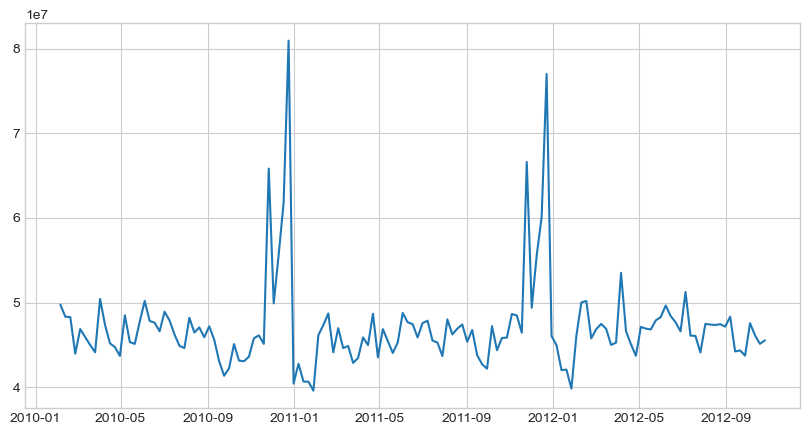

In [19]:
# Average weekly sales for the stores/departments during a week
df_average_sales_weekly = df.groupby(by=["Date"], as_index = False )["Weekly_Sales"].sum()

df_average_sales = df_average_sales_weekly.sort_values("Weekly_Sales", ascending=False)

#print(df_average_sales[:10])

plt.figure(figsize=(10,5))
plt.plot(df_average_sales_weekly.Date, df_average_sales_weekly.Weekly_Sales)
plt.show()



General comments about the graph
**Seasonality - *High-Point***: It seems there are some seasonality to our data, where the end of December seems
    like a popular time to buy our company's specific products.
    The theory is that this has to do with the holidays and people buy gifts for each other, which seems reasonable.
**Seasonality - *Low-Point***: Around the end of january it seems to be a pretty steep dip in the different stores
    sales both during 2011 and 2012.


In [22]:
df1['Date'] = pd.to_datetime((df1['Date']),format='%d-%m-%Y')


C:\Users\HP\AppData\Local\Temp\ipykernel_27280\4139944477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime((df1['Date']),format='%d-%m-%Y')


In [130]:
print(df1["Date"].dtype)

datetime64[ns]


In [23]:
#Creating dummy variables for each month
df1["month"] = df1["Date"].dt.month
df1 = df1.drop(["Date"], axis=1)
df1 = pd.get_dummies(df1,columns=["month"])#, prefix='month')
#df_all_train = df_all_train.drop('Date', 1)
df1


C:\Users\HP\AppData\Local\Temp\ipykernel_27280\2876351739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["month"] = df1["Date"].dt.month


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,False,True,False,False,False,False,False,False,False,False,False,False
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,False,True,False,False,False,False,False,False,False,False,False,False
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,False,True,False,False,False,False,False,False,False,False,False,False
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,False,True,False,False,False,False,False,False,False,False,False,False
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,False,False,False,False,False,False,False,False,True,False,False,False
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,False,False,False,False,False,False,False,False,False,True,False,False
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,False,False,False,False,False,False,False,False,False,True,False,False
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,False,False,False,False,False,False,False,False,False,True,False,False


<Axes: >

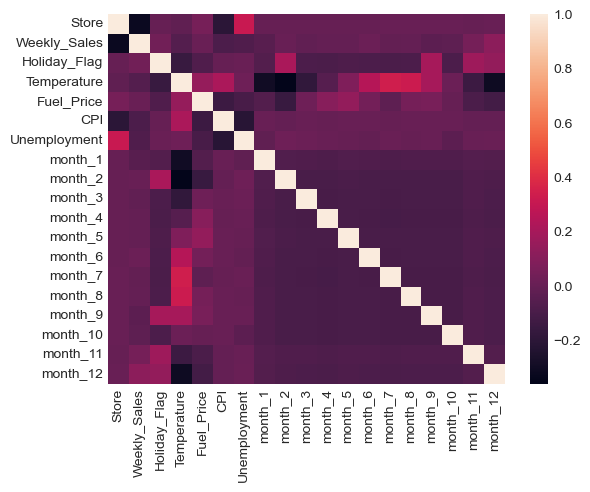

In [132]:
# Correlation between all features
sns.heatmap(df1.corr())


In [29]:
# Correlation between Weekly Sales and all other features
df1_corr = df1[df1.columns[:]].corr()['Weekly_Sales'][:]
df1_corr = df1_corr.drop("Weekly_Sales")
df1_corr

Store          -0.321986
Holiday_Flag    0.036725
Temperature    -0.061389
Fuel_Price      0.011257
CPI            -0.087443
Unemployment   -0.074999
month_1        -0.050810
month_2         0.002630
month_3        -0.018317
month_4        -0.009474
month_5        -0.005766
month_6         0.012194
month_7        -0.011460
month_8        -0.005206
month_9        -0.036057
month_10       -0.030472
month_11        0.045447
month_12        0.119724
Name: Weekly_Sales, dtype: float64

<Axes: >

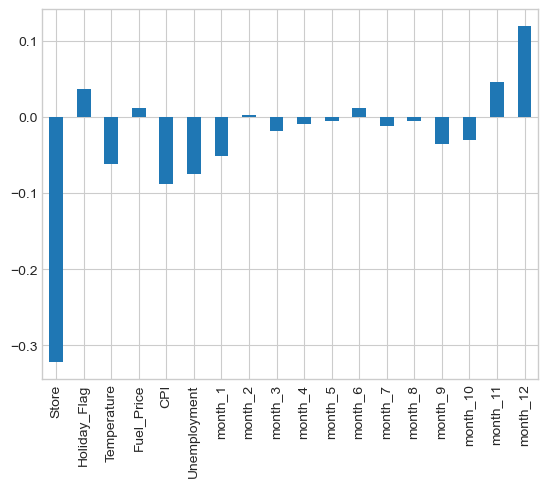

In [133]:
# Plot the correlation 
df1_corr.plot.bar()


General comments about the graph
The correlation table and graph indicate a few things:

Store; Store has huge negative co-realtion with the weekly sales,telling us that having a larger store = more sales.
Only thing to notice is that this could imply that having larger stores will automatically increase revenues,
but it could be linked to the location and being situated where a lot of people are, and therefore it results 
in higher revenue. In short, we can apply the old saying "Correlation is not causation". This indicates areas
for further investigation and potential opportunities for optimizing store operstions & enhancing sales performance.

Fuel- positive corelation with the weekly sales
Holiday-Flag: Positive correlation with sales as well.It implies that the sales is more during holidays and holiday seasons
that is in the month of November- December.


In [29]:
# Correlation between weekly sales and Unemployment

# Group the data by store ID and calculate the correlation coefficient between weekly sales and unemployment rate for each store
store_correlation = df1.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2,-1].reset_index()

#Calculate the Absolute correaltion coefficient for each store
store_correlation['Absolute_Correlation']=store_correlation['Unemployment'].abs()

# Find the store with the highest absolute correlation coefficient
most_affected_store = store_correlation.loc[store_correlation['Absolute_Correlation'].idxmax()]

# Display the store with the highest absolute correlation coefficient
print("Store with the highest absolute correlation coefficient:")
print(most_affected_store)


Store with the highest absolute correlation coefficient:
Store                             36
level_1                 Weekly_Sales
Unemployment                0.833734
Absolute_Correlation        0.833734
Name: 35, dtype: object


# The Store 36 is most affected by the Unemployment Rate

In [34]:
#correlation between CPI and Weekly sales
cpi_sales_correlations=df1['CPI'].corr(df1['Weekly_Sales'])
print("Correlation coefficient between CPI and Weekly Sales" ,cpi_sales_correlations)

Correlation coefficient between CPI and Weekly Sales -0.08744342362418218


# A correlation coefficient of -0.087 indicates a weak negative correlation between CPI and weekly sales. 
Here's how you can interpret it:
- The correlation coefficient ranges from -1 to 1.
- A value close to -1 indicates a strong negative correlation, meaning that as one variable increases,
the other tends to decrease.
- A value close to 0 indicates no linear correlation between the two variables.
- A value close to 1 indicates a strong positive correlation, meaning that as one variable increases, 
the other tends to increase.

In this case, a correlation coefficient of -0.087 suggests a weak negative correlation between CPI and weekly sales. 
This means that there is a slight tendency for weekly sales to decrease as the CPI increases, but the relationship is not
strong.

It's important to note that correlation does not imply causation. Even though there may be a correlation between
CPI and weekly sales, it does not necessarily mean that changes in CPI directly cause changes in weekly sales. 

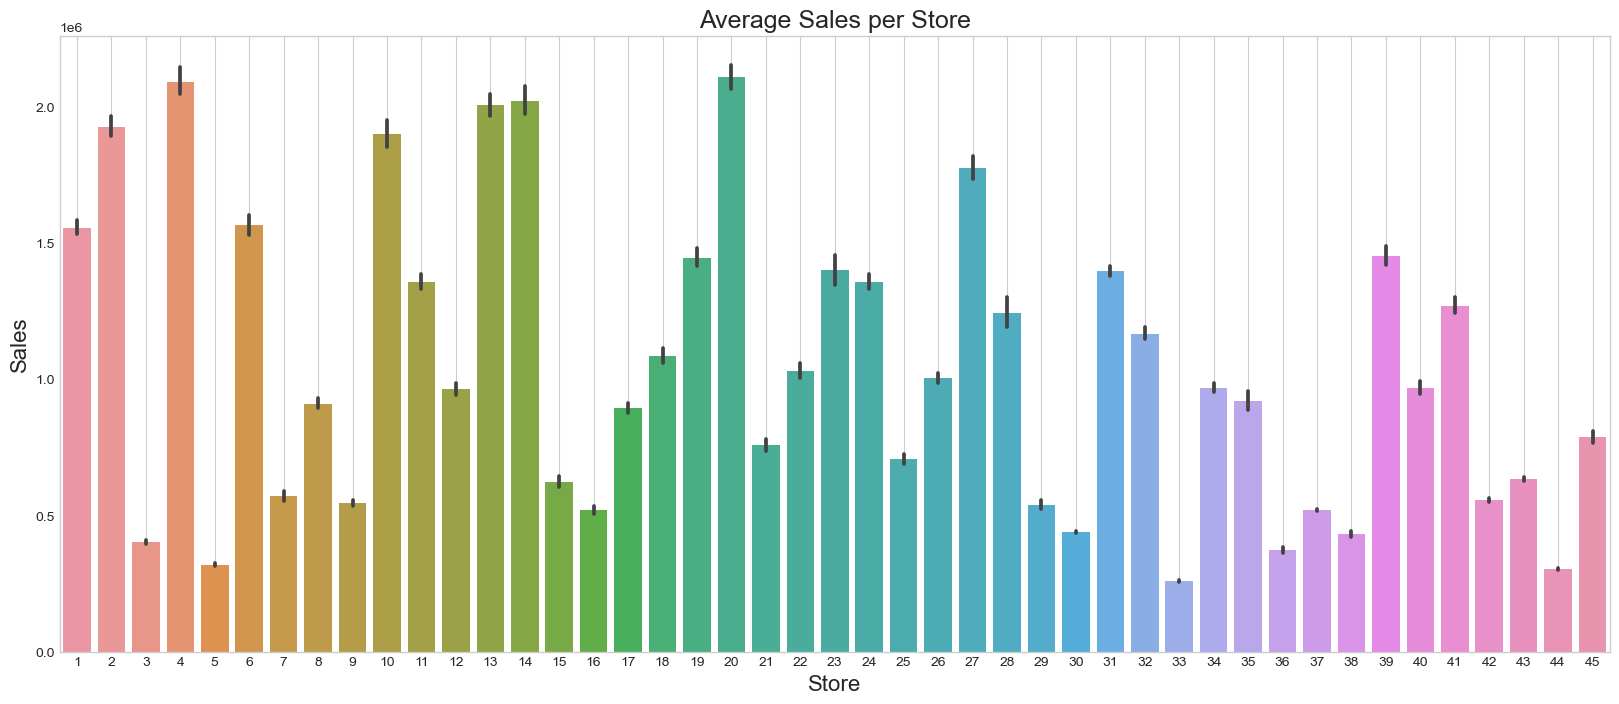

In [30]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df1)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
#plt.savefig('plots/avg_sales_store.png')
plt.show()


# The above graph shows that the top performing store is no20 and the least performing store is no33

In [32]:
# 3. Create Train and Test data (split the dataset)
#X=df[['Store','Date','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
#Y=df["Weekly_Sales"]

X = df1.drop(["Weekly_Sales", "month_8", "month_9", "month_10"], axis=1)
y = df1["Weekly_Sales"]
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_11,month_12
0,1,0,42.31,2.572,211.096358,8.106,False,True,False,False,False,False,False,False,False
1,1,1,38.51,2.548,211.242170,8.106,False,True,False,False,False,False,False,False,False
2,1,0,39.93,2.514,211.289143,8.106,False,True,False,False,False,False,False,False,False
3,1,0,46.63,2.561,211.319643,8.106,False,True,False,False,False,False,False,False,False
4,1,0,46.50,2.625,211.350143,8.106,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684,False,False,False,False,False,False,False,False,False
6431,45,0,64.89,3.985,192.170412,8.667,False,False,False,False,False,False,False,False,False
6432,45,0,54.47,4.000,192.327265,8.667,False,False,False,False,False,False,False,False,False
6433,45,0,56.47,3.969,192.330854,8.667,False,False,False,False,False,False,False,False,False


In [33]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 5954, dtype: float64

#                                        Model building 
We will limit this test to 6 different models:
-Linear Regression (Linear model)
-KNeighborsRegressor (KNN) (neighbors model)
-Decision Tree Regressor (Tree model)
-Random Forest Regressor (Enemble model)
-XGBoost (gradient boosted decision trees)
-Fbprophet Regressor
We will start by creating train, test and final datasets.



In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=56)


In [138]:
# LINEAR REGRESSION MODEL
# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

# Generate predictions on training data
y_pred = lr_model.predict(X_test)
y_pred


array([ 865742.27211863, 1613627.21857308,  833173.8378049 , ...,
       1351438.20496017,  577436.18740542,  991398.25753968])

In [139]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
lrscore = r2_score(y_test, y_pred)
print("R^2:", lrscore)


MAE:  442940.06035511615
MSE:  285666497488.3461
RMSE:  534477.7801633535
R^2: 0.15205686741340652


In [140]:
# KNN MODEL
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [141]:
from sklearn import metrics

# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
knnscore = r2_score(y_test, y_pred)
print("R^2:", knnscore)


MAE:  195002.15217459432
MSE:  92318070781.96852
RMSE:  303838.8895154281
R^2: 0.7259725070266361


In [142]:
# DECISION TREE REGRESSOR

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [143]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
dtscore = r2_score(y_test, y_pred)
print("R^2:", dtscore)


MAE:  92991.12933407947
MSE:  35124253288.53522
RMSE:  187414.656013171
R^2: 0.8957407689557277


In [144]:
# RANDOM FOREST REGRESSOR

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [145]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
rfscore = r2_score(y_test, y_pred)
print("R^2:", rfscore)


MAE:  74138.26178024619
MSE:  20948058653.49304
RMSE:  144734.44183570487
R^2: 0.9378199311699993


In [146]:
# XG BOOST
xg = XGBRegressor()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [147]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
xgbscore = r2_score(y_test, y_pred)
print("R^2:", xgbscore)

MAE:  62008.73790833101
MSE:  12848094807.412966
RMSE:  113349.43673178516
R^2: 0.9618630331013467


In [148]:
# COMPARING MODELS

score = {'model':['lrscore','knnscore','dtscore','rfscore','xgbscore'],'R^2':[lrscore,knnscore,dtscore,rfscore,xgbscore]}


In [149]:
acc_df1 = pd.DataFrame(score)
acc_df1


,model,R^2
0,lrscore,0.152057
1,knnscore,0.725973
2,dtscore,0.895741
3,rfscore,0.937820
4,xgbscore,0.961863


# The XGBOOST model is the best model and let us predict with one more model Fbprophet model and see the 12 weeks's prediction

In [79]:
!pip install prophet

In [88]:
from prophet import Prophet

In [89]:
df #(raw data)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [96]:
Weekly_Sales=df.groupby('Date').sum()['Weekly_Sales'].reset_index()


In [97]:
Weekly_Sales=Weekly_Sales.rename(columns={'Date':'ds','Weekly_Sales':'y'})

In [98]:
Weekly_Sales

,ds,y
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


In [46]:
#initialize the Prophet model
#model=Prophet()

In [107]:
# fit the model into the data.
model=Prophet(interval_width=0.75)
model.fit(Weekly_Sales)

18:00:15 - cmdstanpy - INFO - Chain [1] start processing
18:00:15 - cmdstanpy - INFO - Chain [1] done processing


In [108]:
future=model.make_future_dataframe(periods=12,freq='W')
future.tail(12)

,ds
143,2012-10-28
144,2012-11-04
145,2012-11-11
146,2012-11-18
147,2012-11-25
148,2012-12-02
149,2012-12-09
150,2012-12-16
151,2012-12-23
152,2012-12-30


In [109]:
forecast = model.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(12)


,ds,yhat,yhat_lower,yhat_upper
143,2012-10-28,4.517720e+07,4.133411e+07,4.913261e+07
144,2012-11-04,4.726822e+07,4.344087e+07,5.093085e+07
145,2012-11-11,5.019512e+07,4.610797e+07,5.401829e+07
146,2012-11-18,5.235695e+07,4.850523e+07,5.642816e+07
147,2012-11-25,5.390482e+07,4.978964e+07,5.801844e+07
148,2012-12-02,5.660727e+07,5.279889e+07,6.023272e+07
149,2012-12-09,6.109269e+07,5.720863e+07,6.526833e+07
150,2012-12-16,6.479185e+07,6.097818e+07,6.880349e+07
151,2012-12-23,6.361956e+07,5.945981e+07,6.735060e+07
152,2012-12-30,5.619978e+07,5.222028e+07,6.022495e+07


Text(0.5, 1.0, 'Weekly Sales Forecast')

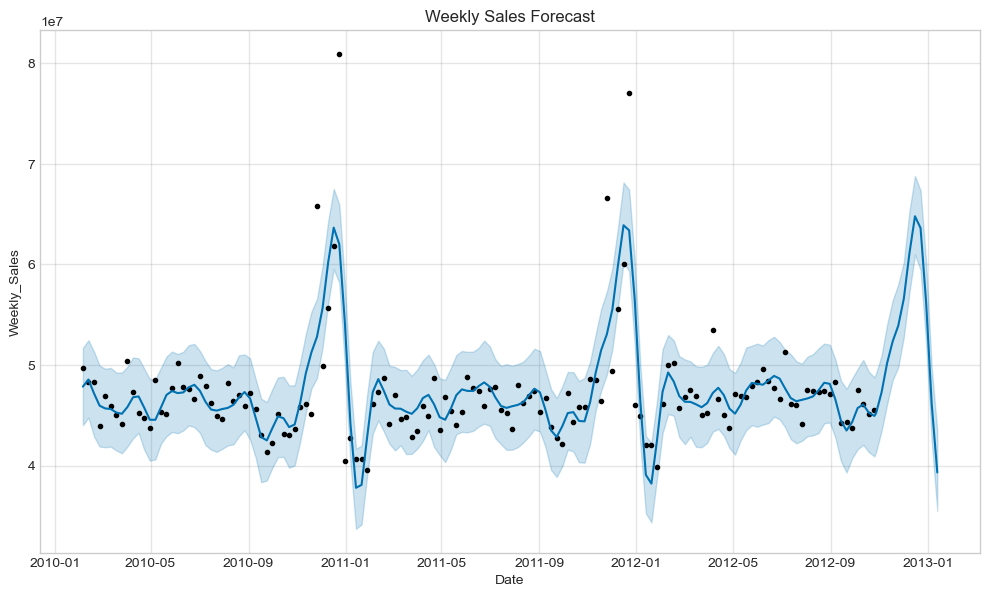

In [113]:
#Weekly_Sales_forecast_plot = model.plot(forecast)
fig=model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Weekly Sales Forecast')

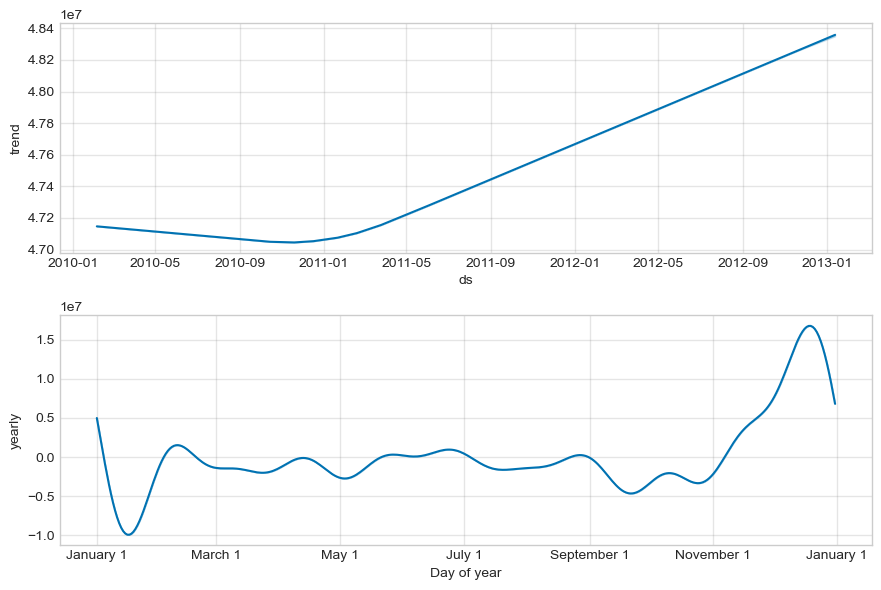

In [111]:
Weekly_Sales_forecast_plot1 = model.plot_components(forecast)

# Inferences:
- The forecast suggests a gradual increase in the weekly sales over the forecast horizon.
- There is a noticeable seasonal pattern in the data, with sales peaking during ceratin periods.
- Overall, the forecast indicates positive growth in the weekly sales, which aligns with the historical trends.
